## Business Understanding

**Title**

**Overview**
 - Clear statement of scope of work(analysis):
    - "This project analyzes ... which includes [data]"
    - "Descriptive analysis of [primary data fields used] which shows...
    - "The [business looking to buy aircraft] can use this analysis to...

**Business Problem**
- Clear statement of business problem:
    - [business] may be able to...at a low risk of...to help diversify their business portfolio

**Data Understanding**
- Clear explanation of data file, fields used, and why

## Data Preparation

**Read data**
- Review/show field characteristics
- Determine focus of business problem
- Determine most relevant fields to solve business problem

**Clean data**
- Replace column names
- Drop unneccessary columns
- Filter out relevant info
- Add filtered columns
- Replace dataframe

**Feature Engineering**
- Create a feature to analyze risk among relevant aircraft
- Lamda functions?
    - Maybe use time-series data if relevant
- Basic measure of central tendancy calcs for reference

## Data Analysis

**Visualizations**
- Import matplotlib / seaborn
- Analysis Q1 w/ associated plot
- Analysis Q2 w/ associated plot
- Analysis Q3 w/ associated plot

## Conclusions

**Recommendations**
- Include at least 3 recommendations that relate to visualizations

## Next Steps

**Futher Analysis**
- Expand data used in analysis?
- Suggest a model to accomplish something important?
- Suggest risk analysis predictions?

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


In [258]:

#dtypes = {'column_name_6': 'int64', 'column_name_7': 'float64', 'column_name_28': 'float64'}
aviation = pd.read_csv('AviationData.csv', encoding='ISO-8859-1', dtype={'column_name_6': 'int64', 'column_name_7': 'float64', 'column_name_28': 'float64'})
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

c:\Users\dangr\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [259]:
aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [260]:
aviation.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [261]:
aviation.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [262]:
# remove unnecessary columns
aviation = aviation.drop(['Latitude', 'Longitude', 'Registration.Number', 'Airport.Code', 'Airport.Name', 'FAR.Description', 'Air.carrier', 'Publication.Date'], axis = 1)
aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Engine.Type,Schedule,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,...,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,...,Reciprocating,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,...,Reciprocating,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,...,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [263]:
# create a column for year
aviation['Event.Year'] = [int(year[:4]) for year in aviation['Event.Date']]
aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Schedule,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Event.Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,...,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,...,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,...,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,...,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1979


In [264]:
# find number of entries for each year
aviation['Event.Year'].value_counts().sort_index()

1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
Name: Event.Year, dtype: int64

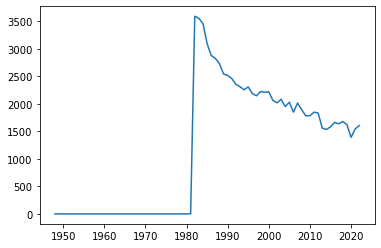

In [265]:
x1 = aviation['Event.Year'].value_counts().sort_index().index
y1 = aviation['Event.Year'].value_counts().sort_index().values

plt.plot(x1, y1)
plt.show()

In [266]:
plane = aviation.loc[(aviation['Aircraft.Category'] == 'Airplane') | (aviation['Aircraft.Category'].isna())]
plane.sort_values(by = 'Event.Date')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Schedule,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Event.Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,...,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,...,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,...,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,...,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,CESSNA,...,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2022
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,PIPER,...,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,BELLANCA,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2022


In [267]:
# sanity check for Aircraft Catetgory
plane['Aircraft.Category'].value_counts()

Airplane    27617
Name: Aircraft.Category, dtype: int64

In [268]:
# find number of entries for each year
plane['Event.Year'].value_counts().sort_index()

1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3205
1983    3555
1984    3455
1985    3094
1986    2880
1987    2828
1988    2729
1989    2543
1990    2518
1991    2462
1992    2354
1993    2313
1994    2253
1995    2307
1996    2185
1997    2142
1998    2218
1999    2199
2000    2211
2001    2038
2002    2006
2003    2043
2004    1859
2005    1896
2006    1746
2007    1846
2008    1631
2009    1491
2010    1539
2011    1602
2012    1553
2013    1314
2014    1294
2015    1332
2016    1439
2017    1403
2018    1423
2019    1392
2020    1206
2021    1331
2022    1377
Name: Event.Year, dtype: int64

In [269]:
#create a dictionary for years and counts
year = list(plane['Event.Year'].value_counts().sort_index().index)
count = list(plane['Event.Year'].value_counts().sort_index().values)
year_dict = {year[i]: count[i] for i in range(len(year))}
year_dict

{1948: 1,
 1962: 1,
 1974: 1,
 1977: 1,
 1979: 2,
 1981: 1,
 1982: 3205,
 1983: 3555,
 1984: 3455,
 1985: 3094,
 1986: 2880,
 1987: 2828,
 1988: 2729,
 1989: 2543,
 1990: 2518,
 1991: 2462,
 1992: 2354,
 1993: 2313,
 1994: 2253,
 1995: 2307,
 1996: 2185,
 1997: 2142,
 1998: 2218,
 1999: 2199,
 2000: 2211,
 2001: 2038,
 2002: 2006,
 2003: 2043,
 2004: 1859,
 2005: 1896,
 2006: 1746,
 2007: 1846,
 2008: 1631,
 2009: 1491,
 2010: 1539,
 2011: 1602,
 2012: 1553,
 2013: 1314,
 2014: 1294,
 2015: 1332,
 2016: 1439,
 2017: 1403,
 2018: 1423,
 2019: 1392,
 2020: 1206,
 2021: 1331,
 2022: 1377}

In [270]:
#show which Event.Years are relevant years
y = 2002
plane['Relevant.Year'] = np.where(plane['Event.Year'] >= y, True, False)
plane.head()

<ipython-input-270-264007f7ea59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['Relevant.Year'] = np.where(plane['Event.Year'] >= y, True, False)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Event.Year,Relevant.Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,...,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,1948,False
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,...,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1962,False
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,...,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,1974,False
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,1977,False
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,...,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1979,False


In [271]:
plane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84219 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                84219 non-null  object 
 1   Investigation.Type      84219 non-null  object 
 2   Accident.Number         84219 non-null  object 
 3   Event.Date              84219 non-null  object 
 4   Location                84169 non-null  object 
 5   Country                 83998 non-null  object 
 6   Injury.Severity         83289 non-null  object 
 7   Aircraft.damage         81201 non-null  object 
 8   Aircraft.Category       27617 non-null  object 
 9   Make                    84159 non-null  object 
 10  Model                   84129 non-null  object 
 11  Amateur.Built           84119 non-null  object 
 12  Number.of.Engines       78838 non-null  float64
 13  Engine.Type             78456 non-null  object 
 14  Schedule                12084 non-null

In [272]:
((plane['Total.Fatal.Injuries'].isna()) 
 & (plane['Total.Serious.Injuries'].isna()) 
 & (plane['Total.Minor.Injuries'].isna()) 
 & (plane['Total.Uninjured'].isna())).sum()

219

In [273]:
plane['injuries_reported'] = ((plane['Total.Fatal.Injuries'].notna()) 
 | (plane['Total.Serious.Injuries'].notna()) 
 | (plane['Total.Minor.Injuries'].notna()) 
 | (plane['Total.Uninjured'].notna()))


<ipython-input-273-6062c3886a86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane['injuries_reported'] = ((plane['Total.Fatal.Injuries'].notna())


In [1]:
plane = plane[plane['injuries_reported'] == True]

NameError: name 'plane' is not defined

In [275]:
plane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84000 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                84000 non-null  object 
 1   Investigation.Type      84000 non-null  object 
 2   Accident.Number         84000 non-null  object 
 3   Event.Date              84000 non-null  object 
 4   Location                83955 non-null  object 
 5   Country                 83783 non-null  object 
 6   Injury.Severity         83070 non-null  object 
 7   Aircraft.damage         81055 non-null  object 
 8   Aircraft.Category       27555 non-null  object 
 9   Make                    83944 non-null  object 
 10  Model                   83913 non-null  object 
 11  Amateur.Built           83936 non-null  object 
 12  Number.of.Engines       78788 non-null  float64
 13  Engine.Type             78365 non-null  object 
 14  Schedule                11889 non-null

In [276]:
plane['Injury.Severity'].value_counts()

Non-Fatal     63876
Fatal(1)       6105
Fatal          4364
Fatal(2)       3686
Incident       2073
              ...  
Fatal(55)         1
Fatal(153)        1
Fatal(138)        1
Fatal(125)        1
Fatal(88)         1
Name: Injury.Severity, Length: 109, dtype: int64

In [283]:
plane['Total.Fatal.Injuries'] = plane['Total.Fatal.Injuries'].fillna(0)
plane['Total.Serious.Injuries'] = plane['Total.Serious.Injuries'].fillna(0)
plane['Total.Minor.Injuries'] = plane['Total.Minor.Injuries'].fillna(0)
plane['Total.Uninjured'] = plane['Total.Uninjured'].fillna(0)

In [278]:
plane['Total.Fatal.Injuries'].isna().sum()

0

In [284]:
plane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83936 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                83936 non-null  object 
 1   Investigation.Type      83936 non-null  object 
 2   Accident.Number         83936 non-null  object 
 3   Event.Date              83936 non-null  object 
 4   Location                83892 non-null  object 
 5   Country                 83719 non-null  object 
 6   Injury.Severity         83006 non-null  object 
 7   Aircraft.damage         80997 non-null  object 
 8   Aircraft.Category       27545 non-null  object 
 9   Make                    83881 non-null  object 
 10  Model                   83850 non-null  object 
 11  Amateur.Built           83936 non-null  object 
 12  Number.of.Engines       78769 non-null  float64
 13  Engine.Type             78345 non-null  object 
 14  Schedule                11858 non-null

In [279]:
plane = plane.dropna(subset = ['Amateur.Built'])

In [280]:
#plane['Amateur.Built'] = plane['Amateur.Built'].replace(to_replace = 'Yes', value = '1')
#plane['Amateur.Built'] = plane['Amateur.Built'].map({'Yes': 1, 'No': 2})
#plane['Amateur.Built'].value_counts()

In [281]:
list(plane['Amateur.Built'].value_counts().index)

['No', 'Yes']

In [282]:
plane.plot(x = plane['Amateur.Built'], y = [plane['Total.Fatal.Injuries'], plane['Total.Serious.Injuries']], kind = 'bar')

KeyError: "None of [Index(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',\n       ...\n       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],\n      dtype='object', length=83936)] are in the [columns]"

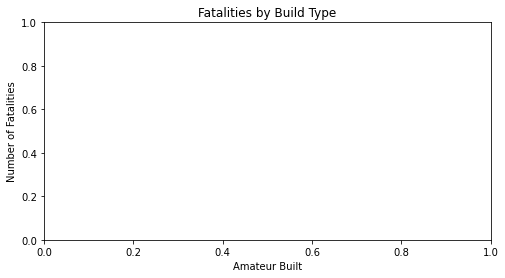

In [ ]:
build_type = list(plane['Amateur.Built'].value_counts().index)
fatalities = list(plane['Total.Fatal.Injuries'].value_counts().values)

fig, ax = plt.subplots(figsize = (8, 4))
ax.bar = (build_type, fatalities)

ax.set_title('Fatalities by Build Type')
ax.set_xlabel('Amateur Built')
ax.set_ylabel('Number of Fatalities');

In [ ]:
ax = plt.subplot()
ax.bar(plane['Total.Fatal.Injuries'], (plane['Amateur.Built'] == 'Yes'))
ax.bar(plane['Total.Fatal.Injuries'], (plane['Amateur.Built'] == 'No', color == 'r'))

In [ ]:
list(aviation['Make'].value_counts())

[22227,
 12029,
 4922,
 4330,
 2841,
 2134,
 1594,
 1151,
 1094,
 1092,
 1042,
 946,
 886,
 795,
 629,
 595,
 588,
 526,
 487,
 445,
 428,
 382,
 360,
 348,
 342,
 331,
 321,
 319,
 311,
 304,
 284,
 255,
 251,
 247,
 242,
 224,
 221,
 218,
 217,
 215,
 179,
 159,
 156,
 156,
 151,
 149,
 144,
 144,
 142,
 141,
 139,
 137,
 136,
 134,
 130,
 129,
 128,
 121,
 118,
 112,
 112,
 112,
 111,
 110,
 108,
 101,
 96,
 95,
 94,
 94,
 92,
 91,
 91,
 91,
 87,
 87,
 86,
 85,
 81,
 80,
 79,
 78,
 78,
 77,
 77,
 74,
 72,
 72,
 71,
 71,
 70,
 70,
 69,
 68,
 65,
 63,
 63,
 63,
 63,
 62,
 62,
 61,
 58,
 58,
 57,
 56,
 56,
 55,
 54,
 54,
 53,
 53,
 51,
 51,
 51,
 50,
 49,
 49,
 47,
 46,
 46,
 45,
 44,
 43,
 43,
 43,
 42,
 42,
 40,
 40,
 40,
 39,
 39,
 39,
 38,
 38,
 37,
 37,
 37,
 37,
 36,
 35,
 35,
 35,
 35,
 34,
 34,
 34,
 33,
 32,
 32,
 31,
 31,
 31,
 30,
 30,
 30,
 30,
 30,
 29,
 29,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 

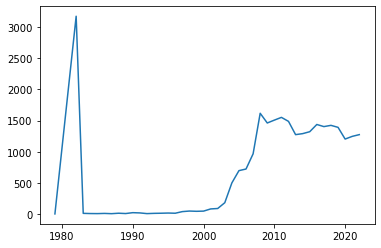

In [ ]:
x2 = df['Event.Year'].value_counts().sort_index().index
y2 = df['Event.Year'].value_counts().sort_index().values

plt.plot(x2, y2)
plt.show()

In [ ]:
aviation['Weather.Condition'].value_counts().sort_index()

IMC     5976
UNK      856
Unk      262
VMC    77303
Name: Weather.Condition, dtype: int64

In [ ]:
df['Number.of.Engines'].value_counts().sort_index()

0.0        9
1.0    21176
2.0     3515
3.0       58
4.0      103
6.0        1
8.0        1
Name: Number.of.Engines, dtype: int64

In [ ]:
df['Engine.Type'].value_counts().sort_index()

Electric               5
Geared Turbofan       12
Reciprocating      20715
Turbo Fan            970
Turbo Jet            158
Turbo Prop          1366
Turbo Shaft           11
UNK                    1
Unknown              153
Name: Engine.Type, dtype: int64

In [ ]:
country = list(aviation['Country'].value_counts().sort_index().index)
count2 = list(aviation['Country'].value_counts().sort_index().values)
country_dict = {country[i]: count2[i] for i in range(len(country))}
country_dict

{'ATLANTIC OCEAN': 81,
 'AY': 1,
 'Afghanistan': 14,
 'Albania': 1,
 'Algeria': 2,
 'American Samoa': 41,
 'Angola': 11,
 'Anguilla': 1,
 'Antarctica': 7,
 'Antigua And Barbuda': 2,
 'Antigua and Barbuda': 3,
 'Argentina': 112,
 'Aruba': 2,
 'Australia': 300,
 'Austria': 56,
 'BLOCK 651A': 1,
 'Bahamas': 216,
 'Bahrain': 9,
 'Bangladesh': 8,
 'Barbados': 6,
 'Belarus': 1,
 'Belgium': 38,
 'Belize': 9,
 'Benin': 1,
 'Bermuda': 2,
 'Bolivia': 34,
 'Bosnia And Herzegovina': 1,
 'Bosnia and Herzegovina': 2,
 'Botswana': 2,
 'Brazil': 374,
 'British Virgin Islands': 8,
 'Bulgaria': 5,
 'CARIBBEAN SEA': 13,
 'Cambodia': 1,
 'Cameroon': 4,
 'Canada': 359,
 'Cayenne': 2,
 'Cayman Islands': 7,
 'Central Africa': 17,
 'Central African Republic': 4,
 'Chad': 1,
 'Chile': 55,
 'China': 67,
 'Colombia': 193,
 'Congo': 7,
 'Corsica': 1,
 'Costa Rica': 30,
 "Cote D'ivoire": 2,
 'Croatia': 12,
 'Cuba': 11,
 'Cyprus': 2,
 'Czech Republic': 16,
 "Côte d'Ivoire": 4,
 'Denmark': 34,
 'Dominica': 5,
 'Domi

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27617 entries, 5 to 88886
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                27617 non-null  object 
 1   Investigation.Type      27617 non-null  object 
 2   Accident.Number         27617 non-null  object 
 3   Event.Date              27617 non-null  object 
 4   Location                27610 non-null  object 
 5   Country                 27610 non-null  object 
 6   Injury.Severity         26803 non-null  object 
 7   Aircraft.damage         26335 non-null  object 
 8   Aircraft.Category       27617 non-null  object 
 9   Make                    27608 non-null  object 
 10  Model                   27586 non-null  object 
 11  Amateur.Built           27600 non-null  object 
 12  Number.of.Engines       24863 non-null  float64
 13  Engine.Type             23391 non-null  object 
 14  FAR.Description         27118 non-null